# Predicting T-shirt size using the ANSUR II dataset
We will here try to predict a persons t-shirt size given the weight and height of the person. We will use the ANSUR II dataset which contains a lot of information about the physical attributes of a large number of people. 

We will first try to map the persons in the dataset to a t-shirt size. It is hard to find a concise size chart for t-shirt so we will create our own, initial chart, based on these assumptions:

We will only look at two measurements, Shoulder Width and Chest Circumference.

Our first problem is that Shoulder Width is not one of the measurements taken in the dataset. But we have Biacromial Breadth which is the distance between the two acromion processes. We will assume that this is the same as Shoulder Width.

We will then have these initial rules:

| Size | Percentile |
|------|------------|
| XS   | 0-5        |
| S    | 5-25       |
| M    | 25-50      |
| L    | 50-75      |
| XL   | 75-90      |
| XXL  | 90-97      |
| XXXL | 97-100     |

## Inspect the data

In [1]:
import pandas as pd

In [2]:
female = pd.read_csv('./data/female.csv')
male = pd.read_csv('./data/male.csv')

In [3]:
print(f'For women we have (rows, columns) {female.shape}')
print(f'For men we have (rows, columns) {male.shape}')


For women we have (rows, columns) (1986, 108)
For men we have (rows, columns) (4082, 108)


## Checking the percentiles

Let us determine the percentiles of the data.

In [4]:
def compute_percentile_ranges(column):
    # Define percentile ranges
    ranges = [(0, 5), (5, 25), (25, 50), (50, 75), (75, 90), (90, 97), (97, 100)]

    percentiles = {(low, high): (column.quantile(low/100), column.quantile(high/100)) for low, high in ranges}

    counts = {}

    for r, (low, high) in percentiles.items():
        counts[r] = ((column >= low) & (column < high)).sum()
    
    return counts

print(compute_percentile_ranges(female['chestcircumference']))
print(compute_percentile_ranges(female['biacromialbreadth']))

print(compute_percentile_ranges(male['chestcircumference']))
print(compute_percentile_ranges(male['biacromialbreadth']))




{(0, 5): np.int64(100), (5, 25): np.int64(396), (25, 50): np.int64(492), (50, 75): np.int64(499), (75, 90): np.int64(299), (90, 97): np.int64(140), (97, 100): np.int64(59)}
{(0, 5): np.int64(93), (5, 25): np.int64(377), (25, 50): np.int64(477), (50, 75): np.int64(541), (75, 90): np.int64(297), (90, 97): np.int64(139), (97, 100): np.int64(61)}
{(0, 5): np.int64(199), (5, 25): np.int64(810), (25, 50): np.int64(1025), (50, 75): np.int64(1012), (75, 90): np.int64(616), (90, 97): np.int64(295), (97, 100): np.int64(124)}
{(0, 5): np.int64(191), (5, 25): np.int64(787), (25, 50): np.int64(989), (50, 75): np.int64(1079), (75, 90): np.int64(610), (90, 97): np.int64(303), (97, 100): np.int64(122)}


## Generate the t-shirt size chart

In [5]:
def compute_size_percentile_mesurments(data, chest_column, shoulder_column):
    sizes = ['XS', 'S', 'M', 'L', 'XL', '2XL', '3XL']
    ranges = [0, 5, 25, 50, 75, 90, 97]

    # Compute the values for each percentile for chest and shoulder
    chest_percentiles = {p: data[chest_column].quantile(p/100) for p in ranges}
    shoulder_percentiles = {p: data[shoulder_column].quantile(p/100) for p in ranges}

    # Map the t-shirt sizes to the corresponding chest and shoulder measurments
    size_mappings = {}
    for i, size in enumerate(sizes):
        size_mappings[size] = {
            'Chest': int(chest_percentiles[ranges[i]]),
            'Shoulder': int(shoulder_percentiles[ranges[i]])
        }
    
    return size_mappings
    


print(compute_size_percentile_mesurments(female, 'chestcircumference', 'biacromialbreadth'))
print(compute_size_percentile_mesurments(male, 'chestcircumference', 'biacromialbreadth'))


{'XS': {'Chest': 695, 'Shoulder': 283}, 'S': {'Chest': 824, 'Shoulder': 335}, 'M': {'Chest': 889, 'Shoulder': 353}, 'L': {'Chest': 940, 'Shoulder': 365}, 'XL': {'Chest': 999, 'Shoulder': 378}, '2XL': {'Chest': 1057, 'Shoulder': 389}, '3XL': {'Chest': 1117, 'Shoulder': 400}}
{'XS': {'Chest': 774, 'Shoulder': 337}, 'S': {'Chest': 922, 'Shoulder': 384}, 'M': {'Chest': 996, 'Shoulder': 403}, 'L': {'Chest': 1056, 'Shoulder': 415}, 'XL': {'Chest': 1117, 'Shoulder': 428}, '2XL': {'Chest': 1172, 'Shoulder': 441}, '3XL': {'Chest': 1233, 'Shoulder': 452}}


In [6]:
# {'XS': {'Chest': 695, 'Shoulder': 283}, 'S': {'Chest': 824, 'Shoulder': 335}, 'M': {'Chest': 889, 'Shoulder': 353}, 'L': {'Chest': 940, 'Shoulder': 365}, 'XL': {'Chest': 999, 'Shoulder': 378}, '2XL': {'Chest': 1057, 'Shoulder': 389}, '3XL': {'Chest': 1117, 'Shoulder': 400}}

female_sizes = {
    'XS': {'Chest': 695, 'Shoulder': 283}, 
    'S': {'Chest': 824, 'Shoulder': 335}, 
    'M': {'Chest': 889, 'Shoulder': 353}, 
    'L': {'Chest': 940, 'Shoulder': 365}, 
    'XL': {'Chest': 999, 'Shoulder': 378}, 
    '2XL': {'Chest': 1057, 'Shoulder': 389}, 
    '3XL': {'Chest': 1117, 'Shoulder': 400}  
    }


male_sizes = {    
    'XS': {'Chest': 774, 'Shoulder': 337}, 
    'S': {'Chest': 922, 'Shoulder': 384},    
    'M': {'Chest': 996, 'Shoulder': 403}, 
    'L': {'Chest': 1056, 'Shoulder': 415}, 
    'XL': {'Chest': 1117, 'Shoulder': 428}, 
    '2XL': {'Chest': 1172, 'Shoulder': 441}, 
    '3XL': {'Chest': 1233, 'Shoulder': 452}
    }

In [7]:
def get_size(data, size_chart):
    matches ={size: 0 for size in size_chart.keys()}
    ties = 0

    for _, row in data.iterrows():
        possible_sizes = []

        for size, measurments in size_chart.items():
            if(row['biacromialbreadth'] <= measurments['Shoulder'] and 
               row['chestcircumference'] <= measurments['Chest']):
                possible_sizes.append(size)
        
        if len(possible_sizes) == 1: 
            matches[possible_sizes[0]] += 1
        elif len(possible_sizes) > 1:
            ties += 1
    return matches, ties

In [8]:
female_matches, female_ties = get_size(female, female_sizes)
male_matches, male_ties = get_size(male, male_sizes)

print('Female matches:', female_matches)
print('Female ties:', female_ties)
print('male matches:', male_matches)
print('male ties:', male_ties)


Female matches: {'XS': 0, 'S': 0, 'M': 0, 'L': 0, 'XL': 0, '2XL': 0, '3XL': 236}
Female ties: 1642
male matches: {'XS': 0, 'S': 0, 'M': 0, 'L': 0, 'XL': 0, '2XL': 0, '3XL': 434}
male ties: 3437


This is not good. Let us have overlapping measurments.

In [9]:
def create_overlapping_size_chart(original_chart):
    overlapping_chart = {}

    sizes = list(original_chart.keys())

    for i, size in enumerate(sizes):
        overlapping_chart[size] = {}
        if i == 0:
            overlapping_chart[size]['Chest'] = [original_chart[size]['Chest'], original_chart[sizes[i+1]]['Chest']+5]
            overlapping_chart[size]['Shoulder'] = [original_chart[size]['Shoulder'], original_chart[sizes[i+1]]['Shoulder']+5]
        
        elif i == len(sizes)-1:
            overlapping_chart[size]['Chest'] = [original_chart[size]['Chest']-5, original_chart[size]['Chest']+1000]
            overlapping_chart[size]['Shoulder'] = [original_chart[size]['Shoulder']-5, original_chart[size]['Shoulder']+1000]

        else:
            overlapping_chart[size]['Chest'] = [original_chart[size]['Chest']-5, original_chart[sizes[i+1]]['Chest']+5]
            overlapping_chart[size]['Shoulder'] = [original_chart[size]['Shoulder']-5, original_chart[sizes[i+1]]['Shoulder']+5]
    
    return overlapping_chart



In [10]:
new_female_sizes = create_overlapping_size_chart(female_sizes)
new_male_sizes = create_overlapping_size_chart(male_sizes)

for k, v in new_female_sizes.items():
    print(f"'{k}': {v}")

print()

for k, v in new_male_sizes.items():
    print(f"'{k}': {v}")


'XS': {'Chest': [695, 829], 'Shoulder': [283, 340]}
'S': {'Chest': [819, 894], 'Shoulder': [330, 358]}
'M': {'Chest': [884, 945], 'Shoulder': [348, 370]}
'L': {'Chest': [935, 1004], 'Shoulder': [360, 383]}
'XL': {'Chest': [994, 1062], 'Shoulder': [373, 394]}
'2XL': {'Chest': [1052, 1122], 'Shoulder': [384, 405]}
'3XL': {'Chest': [1112, 2117], 'Shoulder': [395, 1400]}

'XS': {'Chest': [774, 927], 'Shoulder': [337, 389]}
'S': {'Chest': [917, 1001], 'Shoulder': [379, 408]}
'M': {'Chest': [991, 1061], 'Shoulder': [398, 420]}
'L': {'Chest': [1051, 1122], 'Shoulder': [410, 433]}
'XL': {'Chest': [1112, 1177], 'Shoulder': [423, 446]}
'2XL': {'Chest': [1167, 1238], 'Shoulder': [436, 457]}
'3XL': {'Chest': [1228, 2233], 'Shoulder': [447, 1452]}


In [11]:
female_sizes = {
'XS': {'Chest': [695, 829], 'Shoulder': [283, 340]},
'S': {'Chest': [819, 894], 'Shoulder': [330, 358]},
'M': {'Chest': [884, 945], 'Shoulder': [348, 370]},
'L': {'Chest': [935, 1004], 'Shoulder': [360, 383]},
'XL': {'Chest': [994, 1062], 'Shoulder': [373, 394]},
'2XL': {'Chest': [1052, 1122], 'Shoulder': [384, 405]},
'3XL': {'Chest': [1112, 2117], 'Shoulder': [395, 1400]}
}

male_sizes = {
'XS': {'Chest': [774, 927], 'Shoulder': [337, 389]},
'S': {'Chest': [917, 1001], 'Shoulder': [379, 408]},
'M': {'Chest': [991, 1061], 'Shoulder': [398, 420]},
'L': {'Chest': [1051, 1122], 'Shoulder': [410, 433]},
'XL': {'Chest': [1112, 1177], 'Shoulder': [423, 446]},
'2XL': {'Chest': [1167, 1238], 'Shoulder': [436, 457]},
'3XL': {'Chest': [1228, 2233], 'Shoulder': [447, 1452]}
}

In [12]:
def get_size(data, size_chart):
    matches ={size: 0 for size in size_chart.keys()}
    ties = 0

    size_ordered = list(size_chart.keys())

    for _, row in data.iterrows():
        possible_sizes = []

        for size, measurments in size_chart.items():
            if( row['biacromialbreadth'] >= measurments['Shoulder'][0] and
                row['biacromialbreadth'] <= measurments['Shoulder'][1] and
                row['chestcircumference'] >= measurments['Chest'][0] and
                row['chestcircumference'] <= measurments['Chest'][1]):
                possible_sizes.append(size)
        
        if len(possible_sizes) == 1: 
            matches[possible_sizes[0]] += 1
        elif len(possible_sizes) > 1:
            # Check if sizes are adjacent
            are_adjacent = all([abs(size_ordered.index(possible_sizes[i]) - size_ordered.index(possible_sizes[i+1])) == 1
                                for i in range(len(possible_sizes)-1)])
            
            if are_adjacent:
                # Assign the larger size
                larger_size = max(possible_sizes, key=lambda s: size_ordered.index(s))
                matches[larger_size] += 1
            else:
                ties += 1
        
    return matches, ties

  

In [13]:
# result = all([True, False, True])
# print(result)

x = 10
result = all([x < 15, x == 10, x < 12])
print(result)

True


In [14]:
female_matches, female_ties = get_size(female, new_female_sizes)
male_matches, male_ties = get_size(male, new_male_sizes)

print('Female matches:', female_matches)
print('Female ties:', female_ties)
print('male matches:', male_matches)
print('male ties:', male_ties)

Female matches: {'XS': 23, 'S': 185, 'M': 247, 'L': 276, 'XL': 118, '2XL': 35, '3XL': 13}
Female ties: 0
male matches: {'XS': 63, 'S': 428, 'M': 578, 'L': 593, 'XL': 331, '2XL': 101, '3XL': 50}
male ties: 0


In [15]:
def determine_size(value, measurement, size_dict):
    """
    Determine clothing sizes that match the given body measurement value.
    
    Iterates through the provided size dictionary and finds all sizes where the 
    measurement range contains the given value.
    
    Parameters:
      value: The body measurement value
      measurement: The name of the measurement type
      size_dict: Dictionary mapping clothing sizes to measurement ranges
    
    Returns:
      sizes: List of clothing sizes matching the measurement value
    """
    sizes = []
    for size, measurements in size_dict.items():
        if measurements[measurement][0] <= value <= measurements[measurement][1]:
            sizes.append(size)
    return sizes

def determine_individual_size(row, size_dict):
    """
    Determine individual clothing size based on chest circumference and shoulder width.
    Matches the chest and shoulder measurements to clothing sizes in the provided size dictionary. 
    Returns a single matching size, or the larger of two adjacent sizes if there are multiple matches.
    Returns None if no size matches or adjacent sizes cannot be determined.
    """
    chest_size = determine_size(row['chestcircumference'], 'Chest', size_dict)
    shoulder_size = determine_size(row['biacromialbreadth'], 'Shoulder', size_dict)
    
    matching_sizes = list(set(chest_size) & set(shoulder_size))
    
    if len(matching_sizes) == 1:
        return matching_sizes[0]
    elif len(matching_sizes) > 1:
        # Check if sizes are adjacent, if so, select the larger size
        size_order = list(size_dict.keys())
        adjacent = all([abs(size_order.index(a) - size_order.index(b)) <= 1 for a in matching_sizes for b in matching_sizes])
        if adjacent:
            return max(matching_sizes, key=lambda x: size_order.index(x))
    return None

In [16]:
female.head()

,subjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,...,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,...,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,...,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,...,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,...,Combat Arms,42A,Texas,1,NaN,1,45,63,195,Right hand


In [17]:
female['t-shirt size'] = female.apply(determine_individual_size, args=(female_sizes,), axis=1)
male['t-shirt size'] = male.apply(determine_individual_size, args=(male_sizes,), axis=1)


In [18]:
female['t-shirt size'].value_counts()

t-shirt size
L      276
M      247
S      185
XL     118
2XL     35
XS      23
3XL     13
Name: count, dtype: int64

In [19]:
male['t-shirt size'].value_counts()


t-shirt size
L      593
M      578
S      428
XL     331
2XL    101
XS      63
3XL     50
Name: count, dtype: int64

In [20]:
female_filtered = female.dropna(subset=['t-shirt size'])

male_filtered = male.dropna(subset=['t-shirt size'])



In [21]:
female_filtered.shape

(897, 109)

In [22]:
male_filtered.shape

(2144, 109)

In [23]:
columns = ['chestcircumference', 'biacromialbreadth', 'weightkg', 'stature', 't-shirt size']

female_dataset = female_filtered[columns]
male_dataset = male_filtered[columns]


In [24]:
female_dataset.to_csv('./data/female_sized.csv', index=False)
male_dataset.to_csv('./data/male_sized.csv', index=False)

## Why Create a Scatter Plot

Visualize the distribution of T-Shirt Sizes

Identify Patterns or Trends

Compare Men and Women

Communicate Results

Identify potential anomalies or outliers

C:\Users\D\AppData\Local\Temp\ipykernel_8392\2214390950.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[173.5 181.  185.  ... 176.5 169.  182.8]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  male_dataset.loc[:, 'stature'] = male_dataset['stature'] / 10
C:\Users\D\AppData\Local\Temp\ipykernel_8392\2214390950.py:18: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 92.9 116.2  95.4 ...  89.6  83.2  98.5]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  male_dataset.loc[:, 'weightkg'] = male_dataset['weightkg'] / 10
C:\Users\D\AppData\Local\Temp\ipykernel_8392\2214390950.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[166.  167.1 152.1 166.8 165.4 159.9 167.3 167.8 162.3 166.8 164.4 

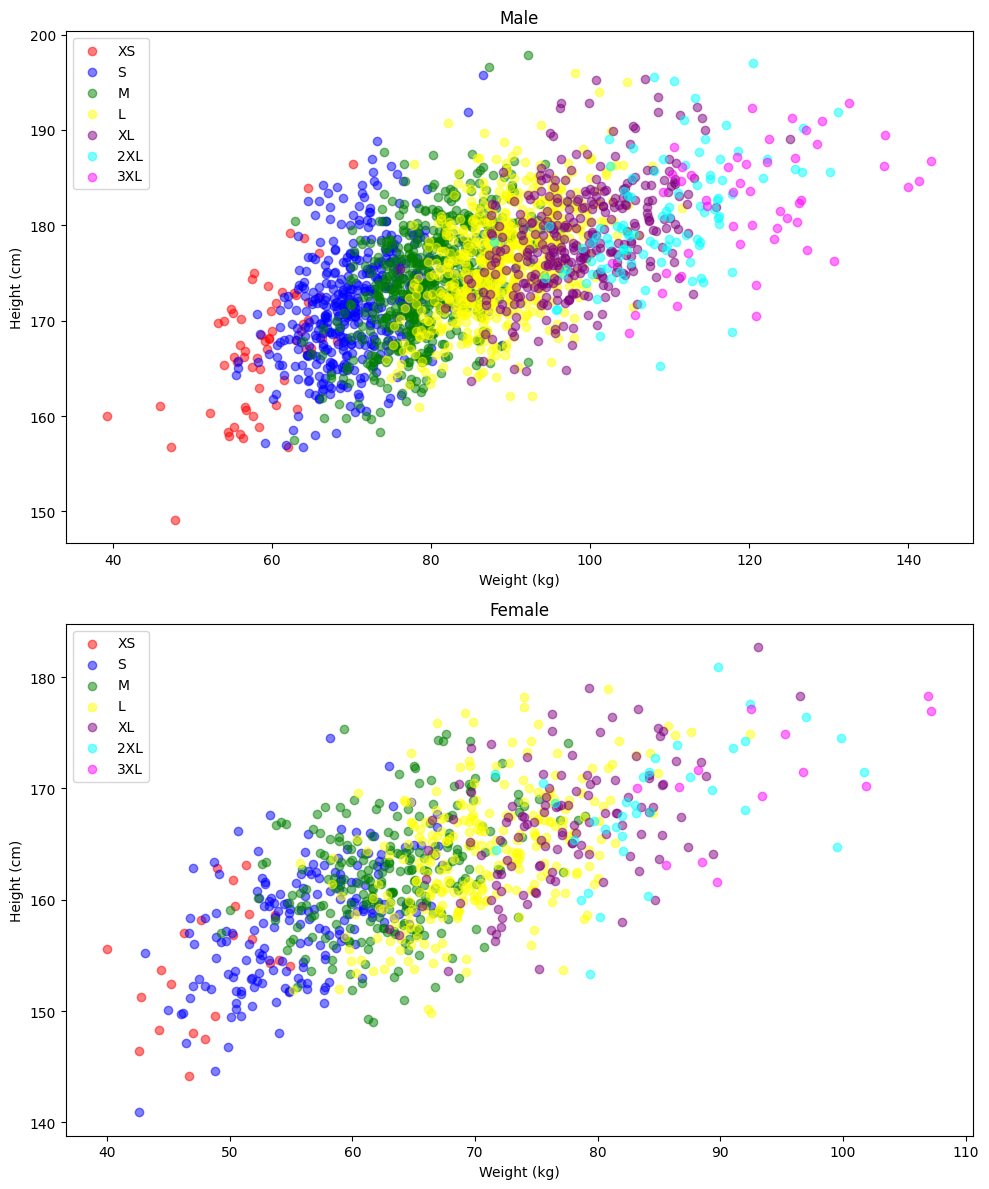

In [25]:
import matplotlib.pyplot as plt

# First let us define a dict to match a t-shirt size to a color
colors = {
    'XS': 'red',
    'S': 'blue',
    'M': 'green',
    'L': 'yellow',
    'XL': 'purple',
    '2XL': 'cyan',
    '3XL': 'magenta'
}

male_dataset = pd.read_csv('./data/male_sized.csv')
female_dataset = pd.read_csv('./data/female_sized.csv')
# For male_dataset
male_dataset.loc[:, 'stature'] = male_dataset['stature'] / 10
male_dataset.loc[:, 'weightkg'] = male_dataset['weightkg'] / 10

# For female_dataset
female_dataset.loc[:, 'stature'] = female_dataset['stature'] / 10
female_dataset.loc[:, 'weightkg'] = female_dataset['weightkg'] / 10

# Create plots for each gender
fig, axes = plt.subplots(nrows=2, figsize=(10, 12))

for ax, gender_data, gender in zip(axes, [male_dataset, female_dataset], ["Male", "Female"]):
    for size, color in colors.items():
        # Filter data by size
        size_data = gender_data[gender_data["t-shirt size"] == size]

        # Plot data
        ax.scatter(size_data["weightkg"], size_data["stature"], c=color, label=size, alpha=0.5)

    ax.set_title(gender)
    ax.set_xlabel("Weight (kg)")
    ax.set_ylabel("Height (cm)")
    ax.legend()

plt.tight_layout()
plt.show()

In [49]:
import numpy as np

class KNNClassifier:
    def __init__(self, k=4):
        # Constructor for KNNClassifier. Initializes class variables.
        self.k=k
        self.X = None
        self.y = None

    def _calculate_distance(self, x1, x2):
        """
        Calculate the Euclidean distance between two data point, x1 and x2
        """
        # Calculate the Euclidean distance between two data points x1 and x2.
        return ((x1 -x2)**2).sum() **0.5
    
   
    def _knn_predict(self, x):
       # Sort all distances and return top k nearest neighbors
        distances = [
             (self._calculate_distance(x, measurement), self.y[i])
             for i, measurement in enumerate(self.X)
        ]
        return sorted(distances, key=lambda x: x[0])[:self.k]
    
    def fit(self, X, y):
        # Train the KNN model with the given training data and labels.
        self.X = np.array(X)
        self.y = np.array(y)
    
    def _predict(self, neighbors):
        # Determine the final prediction based on the majority class of nearest neighbors.
        labels = [n[1] for n in neighbors]
        label, count = np.unique(labels, return_counts=True)
        max_count = np.max(count)
        if np.sum(count == max_count) > 1:
            tied_labels = label[count == max_count]
            # In case of a tie, select the smallest class based on the order in labels
            return min(tied_labels, key=labels.index)
        
        # Otherwise, selct the class with the most votes
        return label[np.argmax(count)]

    def predict(self, X):
        # Make predictions for a given list of data points X.
    # X = [(178,86), (164, 52)]
        predictions = []
        for x in X:
            neighbors = self._knn_predict(x)
            prediction = self._predict(neighbors)
            # Add the prediction to the result list.
            predictions.append(prediction)
        
        return predictions

        

In [50]:
females_X = [(person['stature'], person['weightkg']) for _, person in female_dataset.iterrows()]
females_y = female_dataset['t-shirt size'].values.tolist()

In [51]:
females_y

['XL',
 'L',
 'S',
 'XL',
 '2XL',
 'L',
 'L',
 'M',
 'S',
 'L',
 'L',
 'S',
 'XL',
 'M',
 'L',
 'L',
 'M',
 'M',
 'S',
 'XL',
 'L',
 'L',
 'L',
 '2XL',
 'XS',
 'L',
 'XL',
 'L',
 'L',
 'M',
 'L',
 '2XL',
 'M',
 'S',
 'M',
 'L',
 'L',
 'L',
 'XL',
 'M',
 'XL',
 'S',
 'M',
 'L',
 '2XL',
 'L',
 'S',
 'L',
 'S',
 'XL',
 'S',
 'M',
 'L',
 'XL',
 'M',
 'L',
 'L',
 'L',
 'S',
 'L',
 'S',
 '2XL',
 'L',
 'S',
 'S',
 '3XL',
 'M',
 'L',
 'M',
 'M',
 'M',
 'M',
 'L',
 'M',
 'S',
 'L',
 'M',
 'M',
 'XL',
 'S',
 'M',
 'XL',
 'S',
 'M',
 '3XL',
 'L',
 'M',
 'S',
 '2XL',
 '2XL',
 'L',
 'L',
 'L',
 'L',
 'S',
 'S',
 'S',
 'L',
 'S',
 'S',
 'XL',
 'M',
 'L',
 'XL',
 'M',
 'S',
 '2XL',
 'L',
 'L',
 'L',
 'S',
 'L',
 'L',
 'S',
 'L',
 'L',
 'L',
 'L',
 'L',
 'L',
 'XL',
 'L',
 'L',
 'M',
 'L',
 'L',
 'L',
 'M',
 'L',
 'S',
 'M',
 'L',
 'M',
 'S',
 'S',
 'S',
 'M',
 '2XL',
 'M',
 'L',
 'L',
 '2XL',
 '2XL',
 'XL',
 'XL',
 'M',
 'L',
 'L',
 'L',
 'S',
 'L',
 'M',
 'L',
 'XS',
 'XL',
 'M',
 'S',
 'L',
 'L',
 

In [52]:
model = KNNClassifier()
person = [(154, 51)]
model.fit(females_X, females_y)
prediction = model.predict(person)
prediction

[np.str_('S')]

Test Scikit-learn

In [107]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

male_X = male_dataset.drop(columns=['chestcircumference', 'biacromialbreadth', 't-shirt size'])
male_y = male_dataset['t-shirt size']
female_X = female_dataset.drop(columns=['chestcircumference', 'biacromialbreadth', 't-shirt size'])
female_y = female_dataset['t-shirt size']

male_X_train, male_X_test, male_y_train, male_y_test =train_test_split(male_X, male_y,train_size=0.85,test_size=0.15, random_state=42)

sk_clf = KNeighborsClassifier()
sk_clf.fit(male_X_train, male_y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [108]:
predictions = sk_clf.predict(male_X_test)
predictions

array(['XL', 'M', 'M', 'XL', 'S', 'M', 'XL', 'XL', 'M', 'L', 'M', 'XS',
       'M', 'M', 'S', 'L', 'S', '3XL', 'S', 'L', 'S', 'XL', 'S', 'M', 'S',
       'XL', 'M', 'M', 'L', '2XL', 'M', 'S', 'S', 'L', 'XL', 'M', 'L',
       'S', 'M', 'M', 'M', 'M', '2XL', 'L', 'L', 'M', 'M', 'S', 'M', 'M',
       'S', 'S', 'L', 'M', '2XL', 'L', 'XL', 'S', 'S', 'L', 'M', 'XL',
       'XL', 'L', 'M', 'L', 'XL', 'L', 'M', 'S', 'L', '3XL', 'S', 'S',
       'XL', '2XL', 'S', 'L', 'M', 'L', 'M', 'S', 'XL', 'S', 'XL', 'XS',
       'M', '3XL', 'M', 'S', 'S', 'S', 'L', '2XL', 'L', 'L', 'L', 'S',
       'S', 'L', 'S', 'XL', 'M', 'M', '2XL', 'L', 'XL', 'XS', 'L', 'M',
       'L', 'XL', 'L', 'M', 'M', 'M', 'S', 'L', 'M', '2XL', '3XL', 'M',
       'XL', 'M', 'M', '2XL', 'L', 'L', 'M', 'M', 'S', 'L', 'M', 'XL',
       'M', 'L', 'M', '2XL', 'S', 'XL', 'L', 'XL', 'L', '2XL', 'XL', 'L',
       'S', 'L', 'XL', 'S', 'L', '3XL', 'L', 'S', 'L', 'L', 'M', 'S', 'L',
       'L', 'S', 'L', 'L', 'L', 'L', 'S', 'L', '2XL', 'XS'

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(male_y_test, predictions)

accuracy

0.5993788819875776

: 